<a href="https://colab.research.google.com/github/saurabh863/Capstoneproject/blob/main/PythonProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv(r'/content/drive/MyDrive/Banking dataset/bank-additional-full.csv',sep=';')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


**LET'S look at the dataset size,feature name and their types**

In [ ]:
df.shape

(41188, 21)

In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

Input features (column names):

* age - client's age in years (numeric)
* job - type of job (categorical: admin., blue-collar, entrepreneur, housemaid, management, retired, self-employed, services, student, technician, unemployed, unknown)
* marital - marital status (categorical: divorced, married, single, unknown)
* education - client's education (categorical: basic.4y, basic.6y, basic.9y, high.school, illiterate, professional.course, university.degree, unknown)
* default - has credit in default? (categorical: no, yes, unknown)
* housing - has housing loan? (categorical: no, yes, unknown)
* loan - has personal loan? (categorical: no, yes, unknown)
* contact - contact communication type (categorical: cellular, telephone)
* month - last contact month of the year (categorical: jan, feb, mar, ..., nov, dec)
* day_of_week - last contact day of the week (categorical: mon, tue, wed, thu, fri)
* duration - last contact duration, in seconds (numeric).
* campaign - number of contacts performed and for this client during this campaign (numeric, includes the last contact)
* pdays - number of days that have passed after the client was last contacted from the previous campaign (numeric; 999 means the client has not been previously contacted)
* previous - number of contacts performed for this client before this campaign (numeric)
* poutcome - outcome of the previous marketing campaign (categorical: failure, nonexistent, success)
* emp.var.rate - employment variation rate, quarterly indicator (numeric)
* cons.price.idx - consumer price index, monthly indicator (numeric)
* cons.conf.idx - consumer confidence index, monthly indicator (numeric)
* euribor3m - euribor 3 month rate, daily indicator (numeric)
* nr.employed - number of employees, quarterly indicator (numeric)
* Output feature (desired target):

* y - has the client subscribed a term deposit? (binary: yes,no)
To see the general information on all the DataFrame features (columns), we use the info method:

In [ ]:
df.info() # Checking the information of DataFrame(no. of columns,column labels,data type,memory usage and range index)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
# checking the missing values in dataset(columns)
df.isnull().sum()
# Here we don't have any null or missing values

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [ ]:
# y column says people subscribed or not
df['y'].value_counts()
# we could see that majority of people have not subscribed(no)

no     36548
yes     4640
Name: y, dtype: int64

In [ ]:
# created two dataframe g1 and g2
g1 = df[df['age']<25][['age','y']]  # g1 will have all the age less than 25 (only taking two rows y and age)
g2 = df[df['age']>=25][['age','y']]   # g2 will have all the age grater than or equal to 25

In [ ]:
g1.head()

,age,y
8,24,no
160,24,no
373,22,no
568,23,no
583,24,no


In [ ]:
g2.head()

,age,y
0,56,no
1,57,no
2,37,no
3,40,no
4,56,no


In [ ]:
# comparing purchase rate of g1 and g2
# so we need (number of purchaser / total number of user in group)
g1_purchaser = g1[g1['y']=='yes']
len(g1_purchaser)

256

In [ ]:
print(len(g1))
len(g1_purchaser)/len(g1)*100 # rate of purchase for g1 is 23.97 percent

1068


23.970037453183522

In [ ]:
g2_purchaser = g2[g2['y'] == 'yes']
len(g2_purchaser)

4384

In [ ]:
print(len(g2))
len(g2_purchaser)/len(g2)*100 # purchaser for g2 is 10%

40120


10.927218344965105

INSIGHTS :-
SO WE COULD DRAW THE INSIGHT THAT AGE GROUP LESS THAN 25 HAS GREATER RATE OF SUBSCRIPTION**

In [ ]:
df.describe() # getting the statistical measures

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [ ]:
df['marital'].value_counts(normalize = True)
# we could see most of the data are for marital status

married     0.605225
single      0.280859
divorced    0.111974
unknown     0.001942
Name: marital, dtype: float64

In [ ]:
# checking marital status for subscriber(purchaser)
g1 = df[df['marital']=='married'][['marital','y']]
print(g1.head())

g2 = df[df['marital']=='single'][['marital','y']]
print(g2.head())

g3 = df[df['marital']=='divorced'][['marital','y']]
print(g3.head())

g4 = df[df['marital']=='unknown'][['marital','y']]
print(g4.head())

   marital   y
0  married  no
1  married  no
2  married  no
3  married  no
4  married  no
   marital   y
8   single  no
9   single  no
11  single  no
12  single  no
19  single  no
     marital    y
13  divorced   no
34  divorced   no
71  divorced   no
75  divorced  yes
85  divorced   no
      marital    y
40    unknown   no
390   unknown   no
413   unknown   no
1493  unknown   no
1608  unknown  yes


In [ ]:
g1_purchase = g1[g1['y']=='yes']
print(len(g1_purchase))
g2_purchase = g2[g2['y']=='yes']
print(len(g2_purchase))
g3_purchase = g3[g3['y']=='yes']
print(len(g3_purchase))
g4_purchase = g4[g4['y']=='yes']
print(len(g4_purchase))

2532
1620
476
12


In [ ]:
print(len(g1))
# subscripton rate for married
print(len(g1_purchase)/len(g1)*100) # 10 percent people who are married and have purchased the subscription.

# subscription rate for single
print(len(g2))
print(len(g2_purchase)/len(g2)*100) # 14 percent single people have subscribed

# subscripton rate for divorced
print(len(g3))
print(len(g3_purchase)/len(g3)*100) # 10 percent divorced people have subscribed

# subscripton for unknown
print(len(g4))
print(len(g4_purchase)/len(g4)) # 0.15 percent for unknown people who subscribed

24928
10.157252888318355
11568
14.004149377593361
4612
10.320901994796184
80
0.15


**ANALYSING CALL DURATION**

In [ ]:
df_sorted = df.sort_values(by = 'duration',ascending = False)
df_sorted

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
24091,33,technician,single,professional.course,no,yes,no,telephone,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.406,5195.8,no
22192,52,blue-collar,married,basic.4y,no,no,no,telephone,aug,thu,...,3,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,yes
40537,27,admin.,single,high.school,no,no,no,telephone,aug,fri,...,1,999,0,nonexistent,-1.7,94.027,-38.3,0.888,4991.6,no
13820,31,technician,married,professional.course,no,no,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,yes
7727,37,unemployed,married,professional.course,no,yes,no,telephone,may,fri,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.864,5191.0,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40554,72,retired,married,professional.course,no,no,no,cellular,sep,wed,...,1,999,1,failure,-1.1,94.199,-37.5,0.886,4963.6,no
28063,53,blue-collar,divorced,high.school,no,yes,no,cellular,apr,fri,...,3,999,0,nonexistent,-1.8,93.075,-47.1,1.479,5099.1,no
33015,31,blue-collar,married,basic.9y,no,no,no,cellular,may,mon,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.299,5099.1,no
23031,59,management,married,university.degree,no,yes,no,cellular,aug,tue,...,10,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no


In [ ]:
df_sorted[['age','duration','y','day_of_week','month']].head(5) # we could see people above 25 have higher call duration

,age,duration,y,day_of_week,month
24091,33,4918,no,mon,nov
22192,52,4199,yes,thu,aug
40537,27,3785,no,fri,aug
13820,31,3643,yes,thu,jul
7727,37,3631,yes,fri,may


Sorting results shows that longest calls exceeds 60 minute as value duration is more than 3600 sec or 1 hour.

Out of top 5 duration calls,3 customers made purchase and 2 happened on thursday

This makes sense ifuser talking about an hour user is interested in subscripton.

In [ ]:
df['day_of_week'].value_counts() # thursday has more number of calls

thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64

**Finding the average duration of call on the day of week**

In [ ]:
df.groupby(['day_of_week'])['duration'].mean().reset_index()

,day_of_week,duration
0,fri,252.748818
1,mon,246.568358
2,thu,265.674591
3,tue,260.455995
4,wed,265.883206


On Thursday and wednesday we have higher call duration.

In [ ]:
# converting yes and no to 1 and 0
df['y'] = df['y'].replace({'yes':1,'no':0})
df['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

In [ ]:
df['y'].head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

In [ ]:
# we could get purchase rate
#count of yes/total users means count of 1's by total users
print(df['y'].sum()) # count of all ones
print(len(df))
df['y'].sum()/len(df)

4640
41188


0.11265417111780131

People who made the purchase their average duration

In [ ]:
df[df['y']==1]['duration'].mean()

553.1911637931034

People who not made the purchase their average duration

In [ ]:
df[df['y']==0]['duration'].mean()

220.84480682937507

Average age of subscribed and single people

In [ ]:
df[(df['y']==1) & (df['marital']=='single')]['age'].mean() # so people who are single and subscribing their average age is around 31

31.348765432098766

Average age of subscribed and married people

In [ ]:
df[(df['y']==1) & (df['marital']=='married')]['age'].mean() # so people who are married and subscribing their average age is around 45

45.34123222748815

Average age of subscribed and divorced people

In [ ]:
df[(df['y']==1) & (df['marital']=='divorced')]['age'].mean() # so people who are divorced and subscribing their average age is around 49

49.94327731092437

In [ ]:
df.groupby('marital').mean()['y'].reset_index() # subscription rate for single is higher

<ipython-input-5-5613bd92b4f3>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('marital').mean()['y'].reset_index() # subscription rate for single is higher


,marital,y
0,divorced,0.103209
1,married,0.101573
2,single,0.140041
3,unknown,0.150000


In [ ]:
subs = df[df['y']==1]
subs.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
75,41,blue-collar,divorced,basic.4y,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,1
83,49,entrepreneur,married,university.degree,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,1
88,49,technician,married,basic.9y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,1
129,41,technician,married,professional.course,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,1
139,45,blue-collar,married,basic.9y,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,1


In [ ]:
subs.groupby('marital').mean()['age'].reset_index()

<ipython-input-9-b898c01b3d6d>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subs.groupby('marital').mean()['age'].reset_index()


,marital,age
0,divorced,49.943277
1,married,45.341232
2,single,31.348765
3,unknown,39.583333


In [ ]:
pd.crosstab(df['y'],df['marital'])

marital,divorced,married,single,unknown
y,,,,
0,4136,22396,9948,68
1,476,2532,1620,12


In [ ]:
df.pivot_table(['age','duration'],['job'],aggfunc = 'mean').head(10)

,age,duration
job,,
admin.,38.187296,254.312128
blue-collar,39.555760,264.542360
entrepreneur,41.723214,263.267857
housemaid,45.500000,250.454717
management,42.362859,257.058140
retired,62.027326,273.712209
self-employed,39.949331,264.142153
services,37.926430,258.398085
student,25.894857,283.683429


**VISUALIZATION IN PANDAS USING MATPLOTLIB**

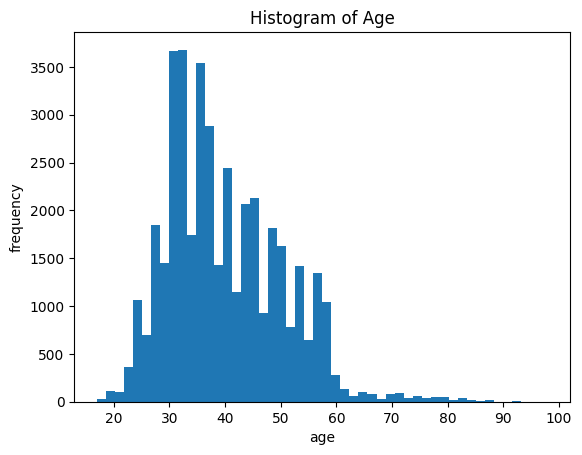

In [5]:
plt.hist(df['age'],bins = 50)
plt.xlabel('age')
plt.ylabel('frequency')
plt.title('Histogram of Age')
plt.show()

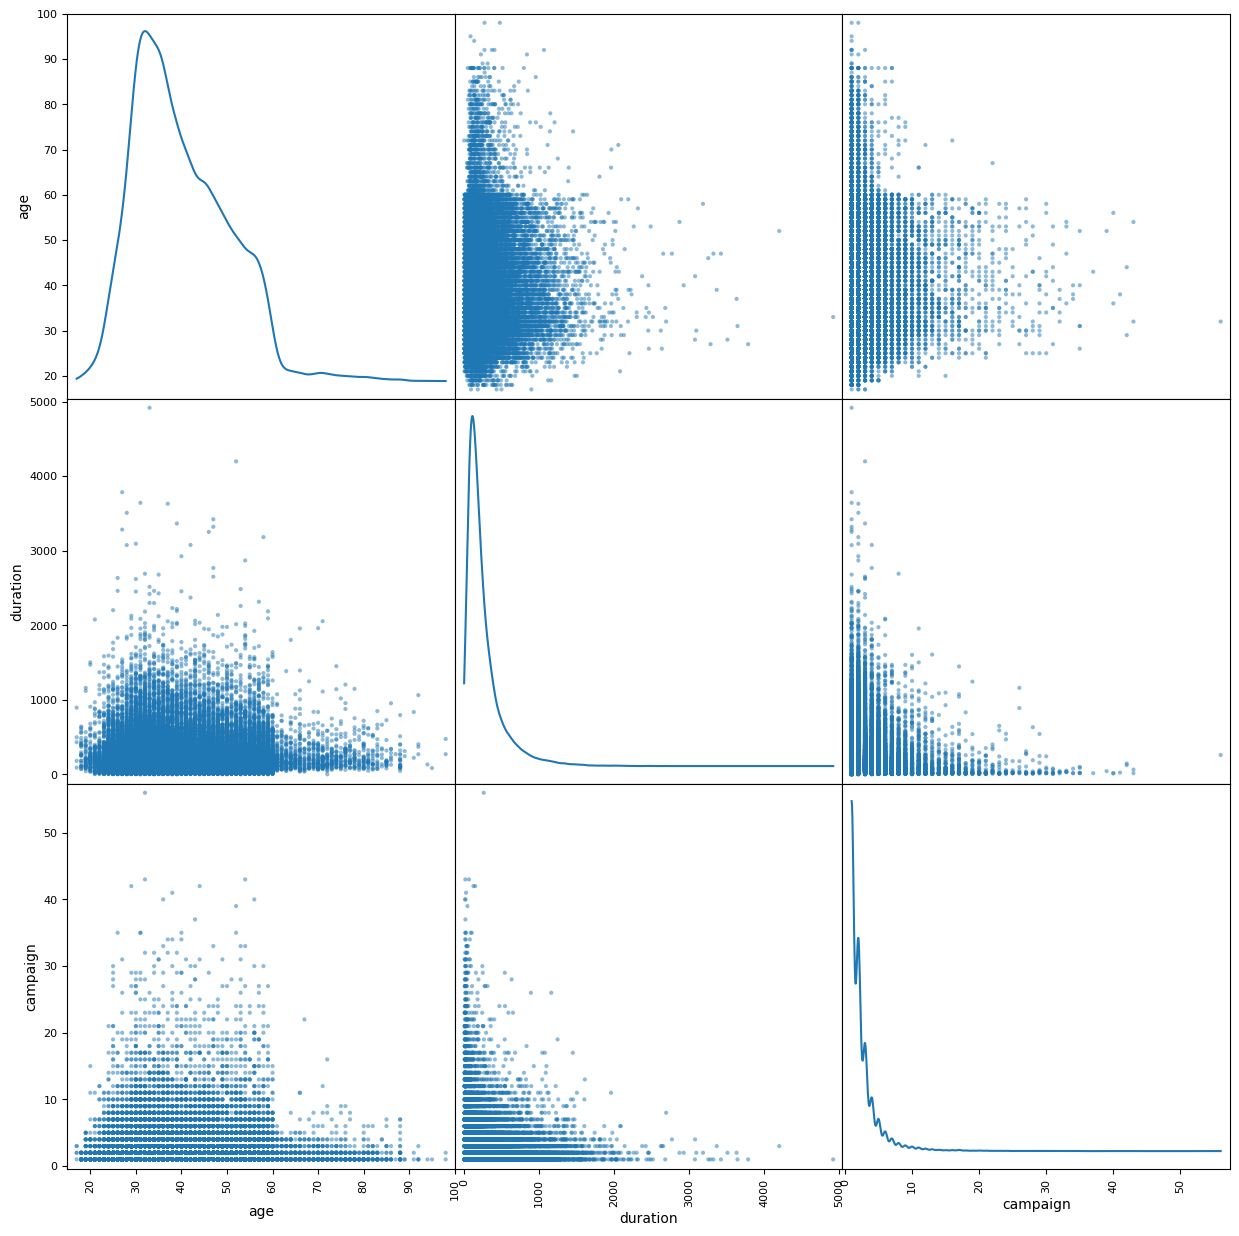

In [6]:
pd.plotting.scatter_matrix(
    df[["age", "duration", "campaign"]],
    figsize = (15, 15),
    diagonal = "kde")
plt.show()

A scatter matrix (pairs plot) compactly plots all the numeric variables we have in a dataset against each other. The plots on the main diagonal allow you to visually define the type of data distribution: the distribution is similar to normal for age, and for a call duration and the number of contacts, the geometric distribution is more suitable.

**A visual analysis of the histograms presented allows us to make preliminary assumptions about the variability of the source data.**

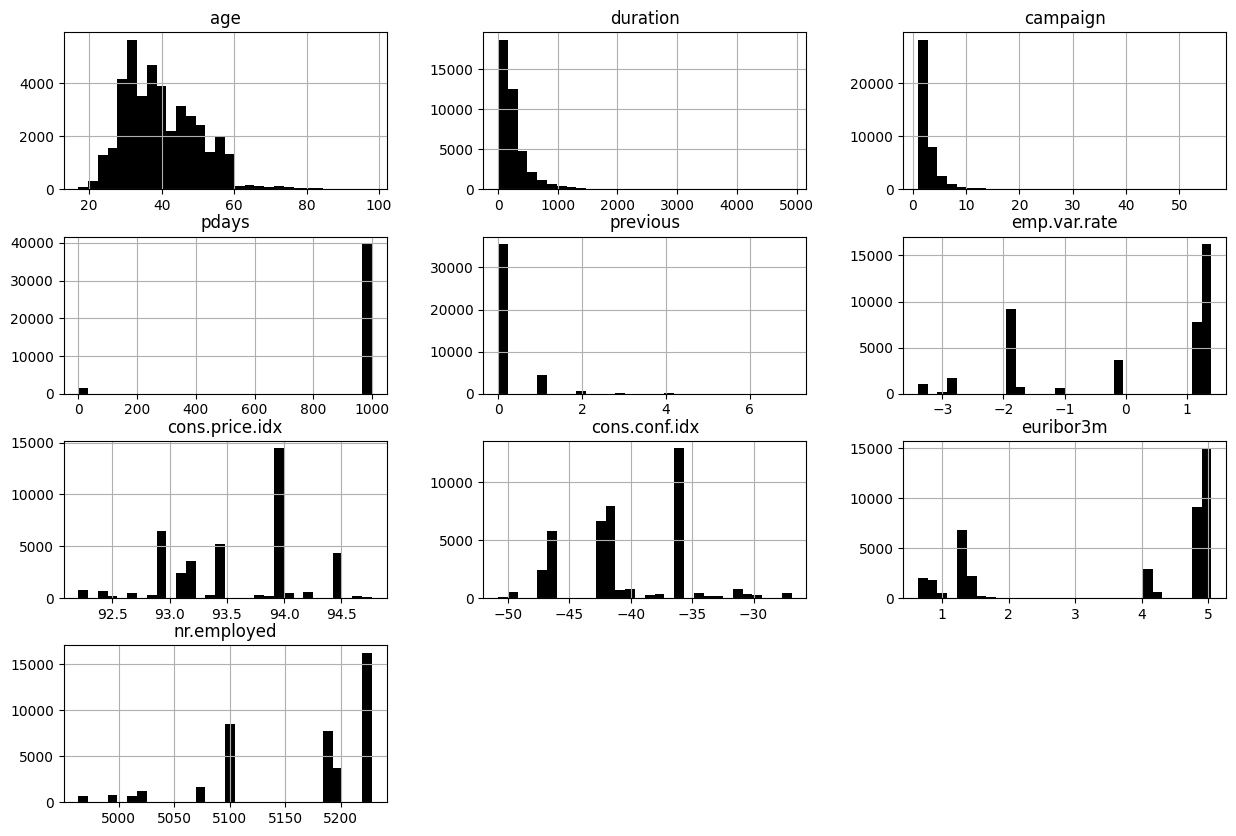

In [7]:
df.hist(color = "k",
        bins = 30,
        figsize = (15, 10))
plt.show()

**Now we will use Box Plot. It will allow us to compactly visualize the main characteristics of the feature distribution (the median, lower and upper quartile, minimal and maximum, outliers).**

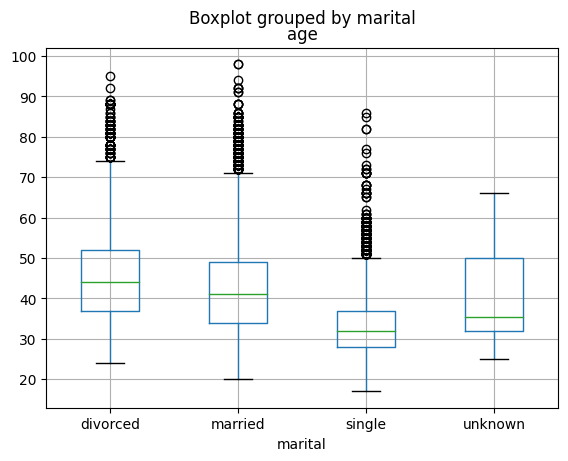

In [8]:
df.boxplot(column = "age",
           by = "marital")
plt.show()

The plot shows that unmarried people are on average younger than divorced and married ones. For the last two groups, there is an outlier zone over 70 years old, and for unmarried - over 50.

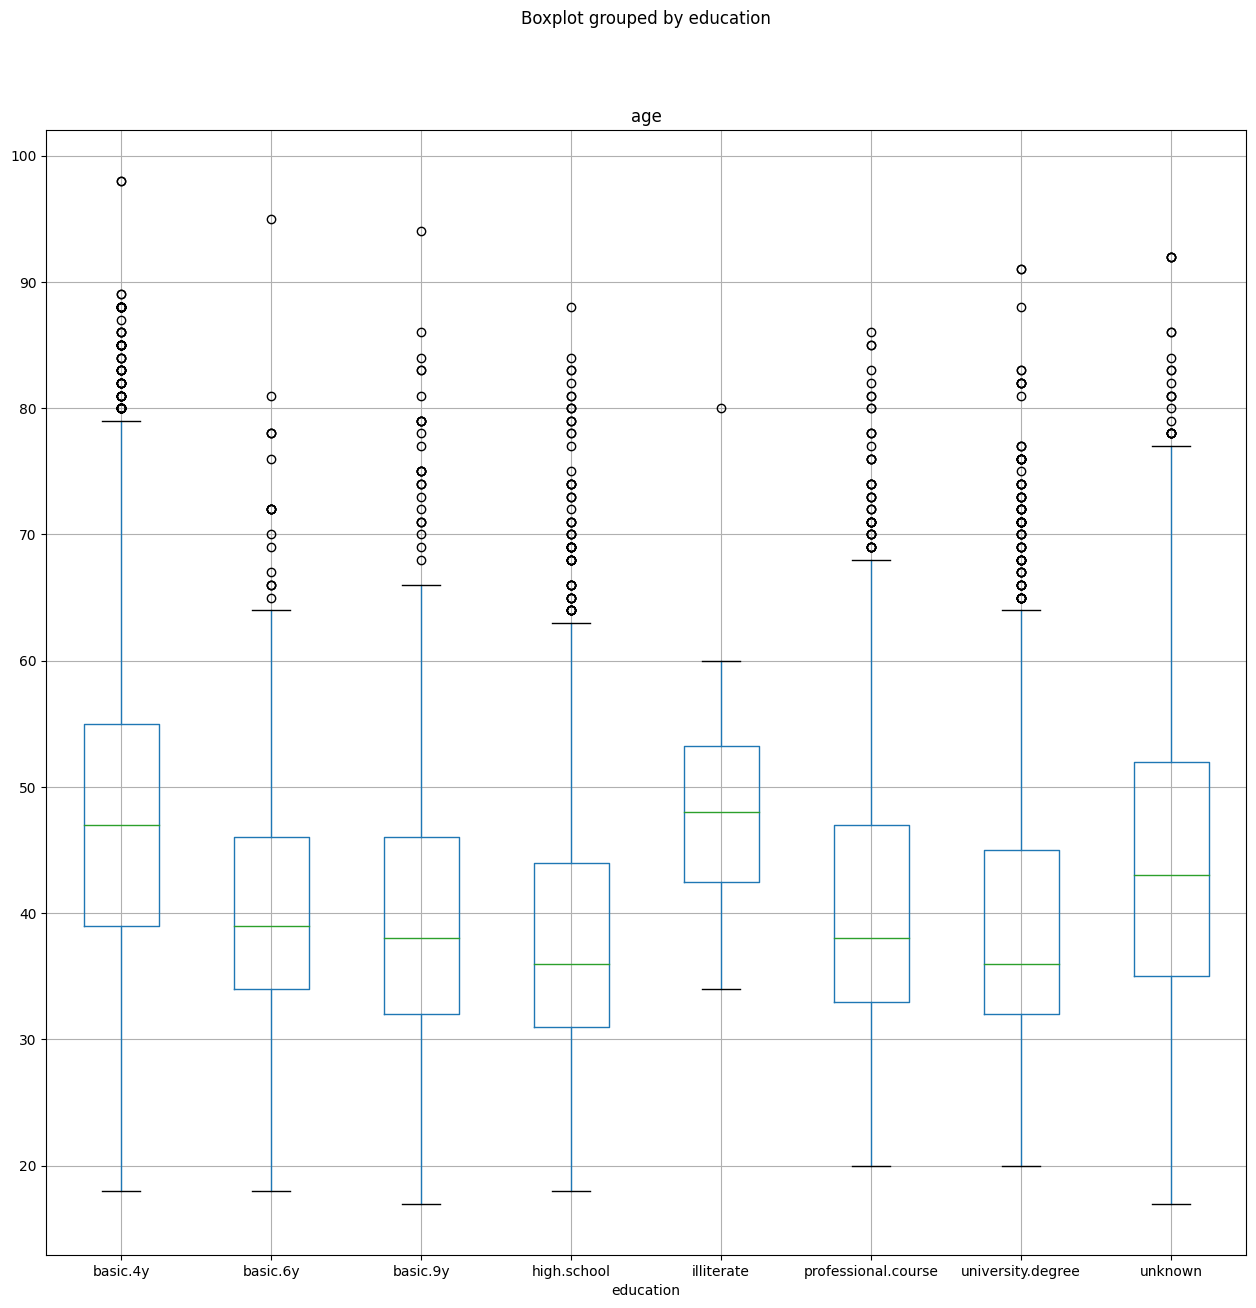

In [9]:
df.boxplot(column = "age",
  by = "education",
  figsize = (15, 15))
plt.show()

Output box plot to analyze the client age distribution by their education level.